In [ ]:
!pip install matplotlib -U

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 92 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif'] # 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False

# 2016~2020년 기상 데이터 가공

In [ ]:
df_2016 = pd.read_csv('/content/drive/MyDrive/Dacon/weather/weather_2016.csv', encoding= 'cp949')
df_2017 = pd.read_csv('/content/drive/MyDrive/Dacon/weather/weather_2017.csv', encoding= 'cp949')
df_2018 = pd.read_csv('/content/drive/MyDrive/Dacon/weather/weather_2018.csv', encoding= 'cp949')
df_2019 = pd.read_csv('/content/drive/MyDrive/Dacon/weather/weather_2019.csv', encoding= 'cp949')
df_2020 = pd.read_csv('/content/drive/MyDrive/Dacon/weather/weather_2020.csv', encoding= 'cp949')
df_weather = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020], ignore_index=True)
df_weather = df_weather[['일시','강수량(mm)', '습도(%)', '기온(°C)']]
df_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43842 entries, 0 to 43841
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일시       43842 non-null  object 
 1   강수량(mm)  3953 non-null   float64
 2   습도(%)    43819 non-null  float64
 3   기온(°C)   43805 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Dacon/data/train.csv', index_col=False, encoding = 'cp949')
df_test = pd.read_csv('/content/drive/MyDrive/Dacon/data/test.csv', index_col=False, encoding = 'cp949')

def create_weather_col(df, test_df=False): # 기상데이터 저장할 컬럼 초기화, 선언.
    if test_df == False:
        df.drop(['조식메뉴'], axis='columns', inplace=True)
    df['점심 비'] = [0.0 for i in range(len(df))]
    df['저녁 비'] = [0.0 for i in range(len(df))]
    df['점심 습도'] = [0.0 for i in range(len(df))]
    df['저녁 습도'] = [0.0 for i in range(len(df))]
    df['점심 기온'] = [0.0 for i in range(len(df))]
    df['저녁 기온'] = [0.0 for i in range(len(df))]

    return df

df_train = create_weather_col(df_train)
df_test = create_weather_col(df_test, test_df=True)

def unuse_day_del(df, w_df):
    # df에 있는 날짜 기반으로 w_df에서 필요한 날의 시간대 데이터만 남김.
    day_list = []
    for i in df['일자']:
        day_list.append(i)

    use_time = ['11:00', '12:00', '17:00', '18:00']

    for i in range(len(w_df)-1, -1, -1):
        if w_df['일시'].iloc[i][:10] not in day_list:
            w_df.drop(i, inplace=True)
        else:
            if w_df['일시'].iloc[i][-5:] not in use_time:
                w_df.drop(i, inplace=True)
    return w_df
    
df_weather = unuse_day_del(df_train, df_weather)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 755 to 43668
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일시       4752 non-null   object 
 1   강수량(mm)  469 non-null    float64
 2   습도(%)    4748 non-null   float64
 3   기온(°C)   4749 non-null   float64
dtypes: float64(3), object(1)
memory usage: 185.6+ KB


In [ ]:
df_weather.reset_index(drop=False, inplace=True)# 인덱스 초기화(필요없는 데이터 삭제후 인덱스가 연속적이지 않다.)

In [ ]:
import math
def nan_to_zero(df): # 현재 사용할 컬럼인 강수량, 기온, 습도는 NaN인 데이터가 많다. 사용하기 위해 0으로 변환한다.
    if math.isnan(df) == True:
        return float(0)
    else :
        return df
df_weather['강수량(mm)'] = df_weather['강수량(mm)'].apply(nan_to_zero) # 21년 데이터의 경우 '누적강수량(mm)' 이다.
df_weather['기온(°C)'] = df_weather['기온(°C)'].apply(nan_to_zero)
df_weather['습도(%)'] = df_weather['습도(%)'].apply(nan_to_zero)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    4752 non-null   int64  
 1   일시       4752 non-null   object 
 2   강수량(mm)  4752 non-null   float64
 3   습도(%)    4752 non-null   float64
 4   기온(°C)   4752 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 185.8+ KB


In [ ]:
def insert_wheather_col_item(df, w_df, df_col_name, w_df_col_name,):
    lunch_time = ['11:00', '12:00']
    dinner_time = ['17:00', '18:00']

    lu_dict = {}
    di_dict = {}

    for i in range(len(w_df)):
        if w_df['일시'].iloc[i][-5:] in lunch_time:
            if df[df['일자'] == w_df['일시'].iloc[i][:10]][df_col_name[0]].values[0] < w_df[w_df_col_name].iloc[i]:
                lu_dict[w_df['일시'].iloc[i][:10]] = w_df[w_df_col_name].iloc[i]
        elif w_df['일시'].iloc[i][-5:] in dinner_time:
            if df[df['일자'] == w_df['일시'].iloc[i][:10]][df_col_name[1]].values[0] < w_df[w_df_col_name].iloc[i]:
                di_dict[w_df['일시'].iloc[i][:10]] = w_df[w_df_col_name].iloc[i]

    for i in range(len(df)):
        if df['일자'].iloc[i] in lu_dict:
            df[df_col_name[0]].iloc[i] = lu_dict[df['일자'].iloc[i]]
        if df['일자'].iloc[i] in di_dict:
            df[df_col_name[1]].iloc[i] = di_dict[df['일자'].iloc[i]]
    
    return df


df_col_list = [['점심 비', '저녁 비'], ['점심 습도', '저녁 습도'], ['점심 기온', '저녁 기온']]
weather_col_list = ['강수량(mm)', '습도(%)', '기온(°C)']
for df_item, weather_item in zip(df_col_list, weather_col_list):
    df_train = insert_wheather_col_item(df_train, df_weather, df_item, weather_item)
df_train.info()

# 2021년 기상 데이터 가공
- 2016~2020년 데이터는 시간단위 데이터다, 하지만 2021년 데이터는 분단위 데이터다.
- 데이터 형식을 살펴보니 hh:mm은 같은 형식이다. 필요한시간의 00분을 기준으로 다른것을 drop하면 된다.

In [ ]:
df_2021_01 = pd.read_csv('/content/drive/MyDrive/Dacon/weather/2021-01.csv', encoding= 'cp949')
df_2021_02 = pd.read_csv('/content/drive/MyDrive/Dacon/weather/2021-02.csv', encoding= 'cp949')
df_2021_03 = pd.read_csv('/content/drive/MyDrive/Dacon/weather/2021-03.csv', encoding= 'cp949')
df_2021_04 = pd.read_csv('/content/drive/MyDrive/Dacon/weather/2021-04.csv', encoding= 'cp949')
df_2021_weather = pd.concat([df_2021_01, df_2021_02, df_2021_03, df_2021_04], ignore_index=True)

In [ ]:
df_2021_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172772 entries, 0 to 172771
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   지점          172772 non-null  int64  
 1   일시          172772 non-null  object 
 2   기온(°C)      172204 non-null  float64
 3   누적강수량(mm)   170424 non-null  float64
 4   풍향(deg)     172597 non-null  float64
 5   풍속(m/s)     172509 non-null  float64
 6   현지기압(hPa)   172772 non-null  float64
 7   해면기압(hPa)   172772 non-null  float64
 8   습도(%)       172772 non-null  float64
 9   일사(MJ/m^2)  172772 non-null  float64
 10  일조(Sec)     172772 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 14.5+ MB


In [ ]:
# 실행시간이 약 19분 정도 걸린다.
# 동작이 끝난뒤 저장을 해준다.
use_time = ['11:00', '12:00', '17:00', '18:00']

for i in range(len(df_2021_weather)-1, -1, -1):
    if df_2021_weather['일시'].iloc[i][-5:] not in use_time:
        df_2021_weather.drop(i, inplace=True)
    elif df_2021_weather['일시'].iloc[i][-2:] != '00':
        df_2021_weather.drop(i, inplace=True)

# 인덱스 리셋
df_2021_weather.reset_index(drop=False, inplace=True)

# 결측치 처리
df_2021_weather['누적강수량(mm)'] = df_2021_weather['누적강수량(mm)'].apply(nan_to_zero)
df_2021_weather['기온(°C)'] = df_2021_weather['기온(°C)'].apply(nan_to_zero)

#저장
df_2021_weather.to_csv('/content/drive/MyDrive/Dacon/weather/2021_weather.csv',index=False, encoding='cp949')

In [ ]:
# 인덱스 리셋 train 채울 데이터
use_train_2021_weather = unuse_day_del(df_train, df_2021_weather)
use_train_2021_weather.reset_index(drop=False, inplace=True)

In [ ]:
# df_train.iloc[1188:] 확인하면  21년 기상 데이터가 존재하지 않는다. 위에서 전처리한 21년 기상데이터를 이용해 채워준다.
df_col_list = [['점심 비', '저녁 비'], ['점심 습도', '저녁 습도'], ['점심 기온', '저녁 기온']]
weather_col_list = ['누적강수량(mm)', '습도(%)', '기온(°C)']

for df_item, weather_item in zip(df_col_list, weather_col_list):
    df_train = insert_wheather_col_item(df_train, use_train_2021_weather, df_item, weather_item)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   중식메뉴            50 non-null     object 
 8   석식메뉴            50 non-null     object 
 9   점심 비            50 non-null     float64
 10  저녁 비            50 non-null     float64
 11  점심 습도           50 non-null     float64
 12  저녁 습도           50 non-null     float64
 13  점심 기온           50 non-null     float64
 14  저녁 기온           50 non-null     float64
dtypes: float64(7), int64(4), object(4)
memory usage: 6.0+ KB


In [ ]:
# 같은 방식으로 df_test도 기상데이터를 채워준다.

# 인덱스 리셋 test 채울 데이터
use_test_2021_weather = unuse_day_del(df_test, df_2021_weather)
use_test_2021_weather.reset_index(drop=False, inplace=True)

for df_item, weather_item in zip(df_col_list, weather_col_list):
    df_test = insert_wheather_col_item(df_test, df_2021_weather, df_item, weather_item)
df_test.info()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   중식메뉴            50 non-null     object 
 8   석식메뉴            50 non-null     object 
 9   점심 비            50 non-null     float64
 10  저녁 비            50 non-null     float64
 11  점심 습도           50 non-null     float64
 12  저녁 습도           50 non-null     float64
 13  점심 기온           50 non-null     float64
 14  저녁 기온           50 non-null     float64
dtypes: float64(7), int64(4), object(4)
memory usage: 6.0+ KB


In [ ]:
df_test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,점심 비,저녁 비,점심 습도,저녁 습도,점심 기온,저녁 기온
0,2021-01-27,수,2983,88,182,5,358.0,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,0.0,0.0,30.1,41.7,8.4,7.6
1,2021-01-28,목,2983,104,212,409,348.0,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,0.0,0.0,23.4,46.7,10.1,1.2
2,2021-01-29,금,2983,270,249,0,294.0,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,0.0,0.0,32.1,32.6,0.4,1.2
3,2021-02-01,월,2924,108,154,538,322.0,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,16.0,16.0,83.3,79.4,10.0,9.4
4,2021-02-02,화,2924,62,186,455,314.0,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,0.0,0.0,20.5,29.7,2.5,0.4


In [ ]:
#  기상 데이터 추가한 train과 test파일 저장
df_train.to_csv('/content/drive/MyDrive/Dacon/data/train.csv',index=False, encoding='cp949')
df_test.to_csv('/content/drive/MyDrive/Dacon/data/test.csv',index=False, encoding='cp949')


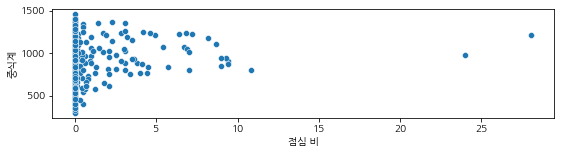

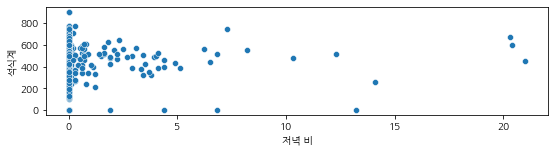

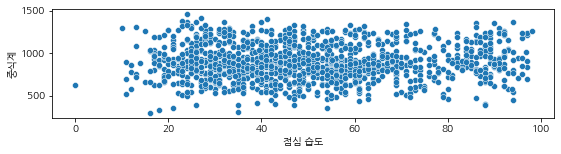

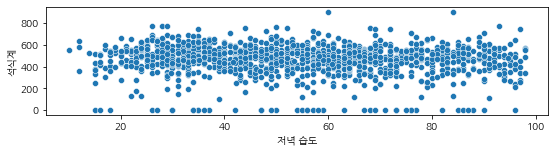

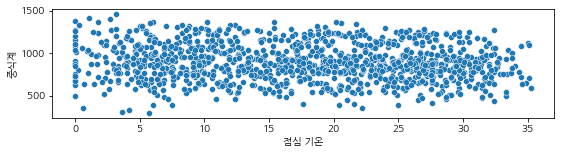

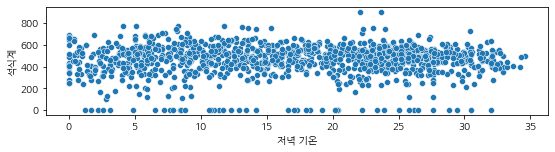

In [ ]:
# 기상 정보와 상관 관계
x_list = [['점심 비', '저녁 비'], ['점심 습도', '저녁 습도'], ['점심 기온', '저녁 기온']]
y_list = ['중식계', '석식계']
for x_items in x_list:
    plt.figure(figsize=(9, 2))
    sns.scatterplot(data=df_train, x=x_items[0], y=y_list[0])
    plt.show()
    plt.figure(figsize=(9, 2))
    sns.scatterplot(data=df_train, x=x_items[1], y=y_list[1])
    plt.show()

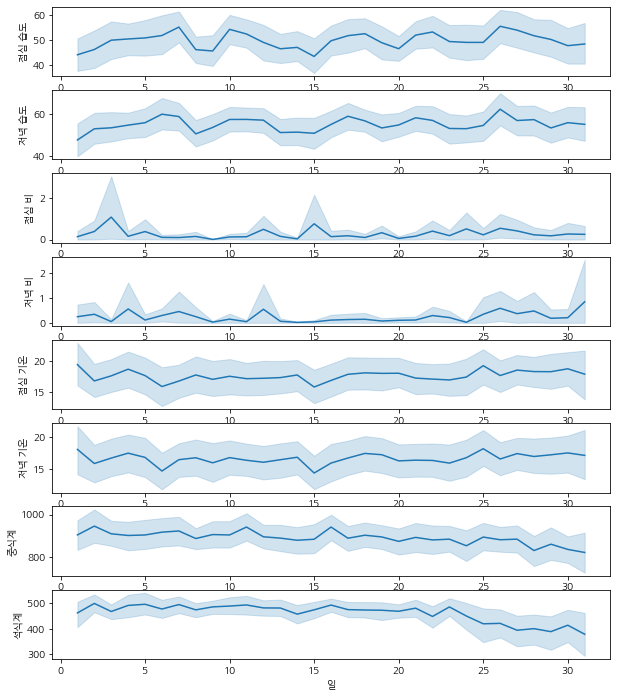

In [ ]:
# 일별 상관관계

df_train['일'] = pd.DatetimeIndex(df_train['일자']).day

fig, ax = plt.subplots(8)
fig.set_size_inches(10,12)

sns.lineplot(data=df_train, x='일', y='점심 습도', ax=ax[0])
sns.lineplot(data=df_train, x='일', y='저녁 습도', ax=ax[1])
sns.lineplot(data=df_train, x='일', y='점심 비', ax=ax[2])
sns.lineplot(data=df_train, x='일', y='저녁 비', ax=ax[3])
sns.lineplot(data=df_train, x='일', y='점심 기온', ax=ax[4])
sns.lineplot(data=df_train, x='일', y='저녁 기온', ax=ax[5])
sns.lineplot(data=df_train, x='일', y='중식계', ax=ax[6])
sns.lineplot(data=df_train, x='일', y='석식계', ax=ax[7])

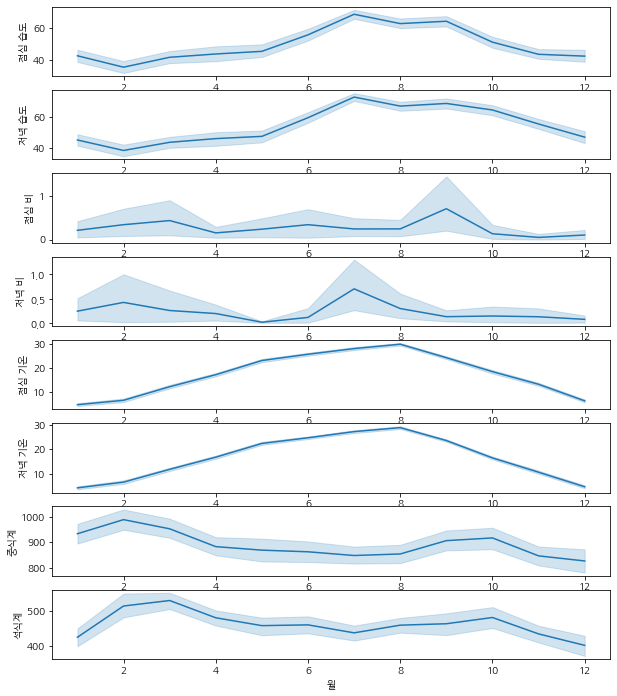

In [ ]:
# 월별 상관관계
df_train['월'] = pd.DatetimeIndex(df_train['일자']).month

fig, ax = plt.subplots(8)
fig.set_size_inches(10,12)

sns.lineplot(data=df_train, x='월', y='점심 습도', ax=ax[0])
sns.lineplot(data=df_train, x='월', y='저녁 습도', ax=ax[1])
sns.lineplot(data=df_train, x='월', y='점심 비', ax=ax[2])
sns.lineplot(data=df_train, x='월', y='저녁 비', ax=ax[3])
sns.lineplot(data=df_train, x='월', y='점심 기온', ax=ax[4])
sns.lineplot(data=df_train, x='월', y='저녁 기온', ax=ax[5])
sns.lineplot(data=df_train, x='월', y='중식계', ax=ax[6])
sns.lineplot(data=df_train, x='월', y='석식계', ax=ax[7])

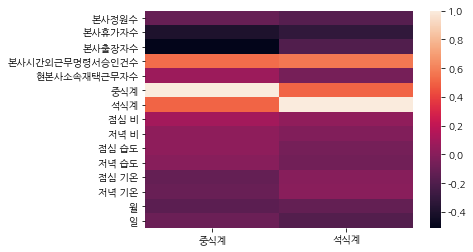

In [ ]:
sns.heatmap(df_train.corr()[['중식계', '석식계']]);

## train, test 파일 로드

In [ ]:
import warnings

warnings.filterwarnings(action='ignore') # 경고 메시지 출력 안함.

train = pd.read_csv('/content/drive/MyDrive/Dacon/data/train.csv', encoding = 'cp949') # 드라이브 마운트 하고 train data 읽어옴
test = pd.read_csv('/content/drive/MyDrive/Dacon/data/test.csv', encoding = 'cp949') # 드라이브 마운트 하고 test data 읽어옴

holidays = pd.read_csv('/content/drive/MyDrive/Dacon/data/holidays.csv', encoding = 'utf-8')
holidays = holidays.drop(['Unnamed: 0', 'dateKind', 'isHoliday', 'seq'], axis =1)

## 전/익일 휴일 여부 (국가지정 공휴일 기반, 월요일 금요일의 경우)
## 월/일 컬럼 생성
## 요일 숫자 변환(월:1, 금:5)

In [ ]:
from datetime import datetime

def holidays_check(df, holidays): # 국자지정 공휴일 정보 반영.
    df['일자'] = df['일자'].apply(lambda x: pd.to_datetime(x))

    tomm_holi = [0 for i in range(len(df))]
    yest_holi = [0 for i in range(len(df))]
    for i in range(len(df)):
        if df.loc[i]['일자'] + pd.DateOffset(days= 1) in list(holidays['date']):
            tomm_holi[i] = 1
        if df.loc[i]['일자'] - pd.DateOffset(days= 1) in list(holidays['date']):
            yest_holi[i] = 1
    df['익일휴일여부'] = tomm_holi
    df['전일휴일여부'] = yest_holi

    return df

holidays['date'] = holidays['locdate'].apply(lambda x: pd.to_datetime(str(x)[:4] + '-' + str(x)[4:6]+ '-'+ str(x)[6:]))
holidays.drop(['locdate'], axis = 1)

train = holidays_check(train, holidays)
test = holidays_check(test, holidays)



train['월'] = pd.DatetimeIndex(train['일자']).month
test['월'] = pd.DatetimeIndex(test['일자']).month

train['일'] = pd.DatetimeIndex(train['일자']).day
test['일'] = pd.DatetimeIndex(test['일자']).day


def day_to_num(d):
    if d == '월':
        return 1
    elif d == '화':
        return 2
    elif d == '수':
        return 3
    elif d == '목':
        return 4
    elif d == '금':
        return 5

weekday = {
    '월': 1,
    '화': 2,
    '수': 3,
    '목': 4,
    '금': 5
}

train['요일'] = train['요일'].apply(day_to_num)
test['요일'] = test['요일'].map(weekday)

def holidays_check_2(df): # 요일 기준 휴일정보 반영
    for i in range(len(df)):
        if df['요일'].iloc[i] == 1:
            df['전일휴일여부'].iloc[i] = 1
        
        if df['요일'].iloc[i] == 5:
            df['익일휴일여부'].iloc[i] = 1
    return df

train = holidays_check_2(train)
test = holidays_check_2(test)

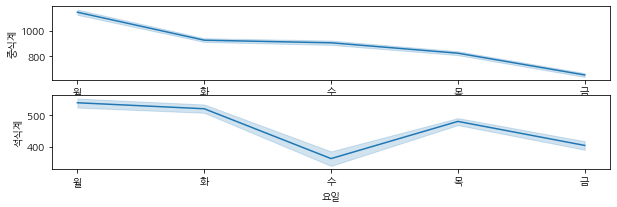

In [ ]:
fig, ax = plt.subplots(2)
fig.set_size_inches(10,3)
sns.lineplot(data=df_train, x='요일', y='중식계', ax=ax[0])
sns.lineplot(data=df_train, x='요일', y='석식계', ax=ax[1])

## "식사 가능자" 컬럼 생성 = 총원 - (휴가자 + 재택근무자)
## "참여율" 컬럼 생성 = (중식계 or 석식계) / 식사 가능자수
## 석식의 경우 요일별 랭크 생성

In [ ]:
train['식사가능자수'] = train['본사정원수'] - train['본사휴가자수'] - train['현본사소속재택근무자수']
test['식사가능자수'] = test['본사정원수'] - test['본사휴가자수'] - test['현본사소속재택근무자수']

train['중식참여율'] = train['중식계'] / train['식사가능자수']
train['석식참여율'] = train['석식계'] / train['식사가능자수']

weekday_rank4dinner = {
    1: 1,
    2: 2,
    3: 5,
    4: 3,
    5: 4,
}

train['요일(석식)'] = train['요일'].map(weekday_rank4dinner)
test['요일(석식)'] = test['요일'].map(weekday_rank4dinner)

## 숫자로 구성된 요일을 원핫 인코딩한다.

In [ ]:
def lu_day_one_hot_encoding(df):
    day_list = ['월요일', '화요일', '수요일', '목요일', '금요일']
    df[day_list] = 0
    for i in range(len(df)):
        for idx, day in enumerate(day_list):
            if df['요일'].iloc[i] == idx+1:
                df[day].iloc[i] = 1
            else :
                df[day].iloc[i] = 0
    return df

def di_day_one_hot_encoding(df):
    day_list = ['월요일(석식)', '화요일(석식)', '수요일(석식)', '목요일(석식)', '금요일(석식)']
    df[day_list] = 0
    for i in range(len(df)):
        for idx, day in enumerate(day_list):
            if df['요일(석식)'].iloc[i] == idx+1:
                df[day].iloc[i] = 1
            else :
                df[day].iloc[i] = 0
    return df

train = lu_day_one_hot_encoding(train)
test = lu_day_one_hot_encoding(test)

train = di_day_one_hot_encoding(train)
test = di_day_one_hot_encoding(test)

In [ ]:
x_lu_train = train[['월', '일', '월요일', '화요일', '수요일', '목요일', '금요일', '식사가능자수', '본사출장자수', '본사시간외근무명령서승인건수', '익일휴일여부', '전일휴일여부', '점심 비', '점심 습도', '점심 기온']]
y_lu_train = train['중식계']
x_lu_test = test[['월', '일', '월요일', '화요일', '수요일', '목요일', '금요일', '식사가능자수', '본사출장자수', '본사시간외근무명령서승인건수', '익일휴일여부', '전일휴일여부', '점심 비', '점심 습도', '점심 기온']]

x_di_train = train[['월', '일', '월요일(석식)', '화요일(석식)', '수요일(석식)', '목요일(석식)', '금요일(석식)', '식사가능자수', '본사출장자수', '본사시간외근무명령서승인건수', '익일휴일여부', '전일휴일여부', '저녁 비', '저녁 습도', '저녁 기온']]
y_di_train = train['석식계']
x_di_test= test[['월', '일', '월요일(석식)', '화요일(석식)', '수요일(석식)', '목요일(석식)', '금요일(석식)', '식사가능자수', '본사출장자수', '본사시간외근무명령서승인건수', '익일휴일여부', '전일휴일여부', '저녁 비', '저녁 습도', '저녁 기온']]

# 모델 훈련.

## 모델 설치.

In [ ]:
!pip install lightgbm
!pip install catboost

     |████████████████████████████████| 69.2 MB 5.1 kB/s 


## 파라미터는 디폴트값 이용하며 앙상블중 보팅 사용.
## Cat, XGB, LGBM 을 이용한다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델 선언
lunch_Cat = CatBoostRegressor()
lunch_RF = RandomForestRegressor()
lunch_XGB = XGBRegressor()
lunch_LGBM = LGBMRegressor()

# 보팅 생성
lunch_ensemble = VotingRegressor([('l_Cat', lunch_Cat), ('l_XGB', lunch_XGB), ('l_LGBM', lunch_LGBM)])
# 훈련
lunch_ensemble.fit(x_lu_train, y_lu_train) # 데이콘 제출용


# 모델 선언
dinner_Cat = CatBoostRegressor()
dinner_RF = RandomForestRegressor()
dinner_XGB = XGBRegressor()
dinner_LGBM = LGBMRegressor()

# 보팅 생성
dinner_ensemble = VotingRegressor([('d_Cat', dinner_Cat), ('d_XGB', dinner_XGB), ('d_LGBM', dinner_LGBM)])
# 훈련
dinner_ensemble.fit(x_di_train, y_di_train) # 데이콘 제출용

# 예측
pred1 = lunch_ensemble.predict(x_lu_test)
pred2 = dinner_ensemble.predict(x_di_test)


# 정답지 로드
submit = pd.read_csv('/content/drive/MyDrive/Dacon/data/sample_submission.csv', engine='python')

# 답안작성 후 저장
submit['중식계'] = pred1
submit['석식계'] = pred2
submit.to_csv('/content/drive/MyDrive/Dacon/data/ensemble_submission.csv', index=False) # 저장


In [ ]:
submit.iloc[:]

,일자,중식계,석식계
0,2021-01-27,1050.562922,217.272658
1,2021-01-28,977.427296,478.922825
2,2021-01-29,645.838619,249.417183
3,2021-02-01,1271.915105,591.522498
4,2021-02-02,1043.168151,574.853937
5,2021-02-03,1036.055805,450.619351
6,2021-02-04,1007.444308,565.889030
7,2021-02-05,720.094801,369.857927
8,2021-02-08,1305.563223,676.123860
9,2021-02-09,1079.720303,599.788218


In [ ]:
pip install optuna

     |████████████████████████████████| 301 kB 7.8 MB/s 
     |████████████████████████████████| 80 kB 9.0 MB/s 
     |████████████████████████████████| 164 kB 34.1 MB/s 
     |████████████████████████████████| 75 kB 4.9 MB/s 
     |████████████████████████████████| 141 kB 30.7 MB/s 
     |████████████████████████████████| 111 kB 41.5 MB/s 
     |████████████████████████████████| 49 kB 7.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=d3983961f6099cf9de4946c09da214fd807e369a425dd96a1dd5aa33c82778eb
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna
SAMPLE_RATE = 0.4
RANDOM_SEED = 1
EARLY_STOPPING_ROUND = 100
X_train, X_valid, y_train, y_valid = train_test_split(x_lu_train, y_lu_train, test_size=0.2, random_state=RANDOM_SEED)
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.1, random_state=RANDOM_SEED)
def objective(trial):
    param = {}
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.01, 0.02, 0.001)
    param['depth'] = trial.suggest_int('depth', 7, 9)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8])
    param['grow_policy'] = 'Depthwise'
    param['iterations'] = 1000
    param['use_best_model'] = True
    param['eval_metric'] = 'MAE'
    param['od_type'] = 'iter'
    param['od_wait'] = 20
    param['random_state'] = RANDOM_SEED
    param['logging_level'] = 'Silent'
    regressor = CatBoostRegressor(**param)
    regressor.fit(X_train.copy(), y_train.copy(),
        eval_set=[(X_eval.copy(), y_eval.copy())],
                  early_stopping_rounds=EARLY_STOPPING_ROUND)
    loss = mean_squared_error(y_valid, regressor.predict(X_valid.copy()))
    return loss

study = optuna.create_study(study_name=f'catboost-seed{RANDOM_SEED}')
study.optimize(objective, n_trials=500, n_jobs=-1, timeout=24000)

[I 2021-07-24 05:31:02,288] A new study created in memory with name: catboost-seed1
Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2021-07-24 05:31:10,733] Trial 1 finished with value: 8316.176785796533 and parameters: {'learning_rate': 0.014, 'depth': 7, 'l2_leaf_reg': 4.0, 'min_child_samples': 4}. Best is trial 1 with value: 8316.176785796533.
[I 2021-07-24 05:31:13,084] Trial 0 finished with value: 8535.705664214418 and parameters: {'learning_rate': 0.019000000000000003, 'depth': 9, 'l2_leaf_reg': 2.0, 'min_child_samples': 8}. Best is trial 1 with value: 8316.176785796533.
[I 2021-07-24 05:31:17,795] Trial 2 finished with value: 8493.810254361582 and parameters: {'learning_rate': 0.013000000000000001, 'depth': 7, 'l2_leaf_reg': 3.5, 'min_child_samples': 8}. Best is trial 1 with value: 8316.176785796533.
[I 2021-07-24 05:31:29,032] Trial 4 finished with value: 8382.181024915542 and parameters: {'learning_rate': 0.01, 'depth': 8, 'l

In [ ]:
study.best_params

{'depth': 7,
 'l2_leaf_reg': 2.5,
 'learning_rate': 0.011,
 'min_child_samples': 4}

In [ ]:
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(study)

In [ ]:
# 하이퍼파라미터 최적화 과정을 확인
optuna.visualization.plot_optimization_history(study)